Birth Weights

One of the aims of a study was to see whether maternal smoking was associated with birth weight. 
In this analysis we will be looking at the variables, the distribuition of the data and raise an hypothesy
We'll start by selecting just Birth Weight and Maternal Smoker. In this case, there are 715 non-smokers 
among the women in the sample, and 459 smokers.

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

In [4]:
sns.set(style="darkgrid")
warnings.filterwarnings("ignore")

In [5]:
births_df = pd.read_csv('./data/baby.csv')
births_df.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


In [6]:
births_df['Maternal Smoker'].value_counts()

False    715
True     459
Name: Maternal Smoker, dtype: int64

In [7]:
smoking_and_birthweight_df = births_df[['Maternal Smoker', 'Birth Weight']]

Let's look at the distribution of the birth weights of the babies of the non-smoking mothers compared to those of the smoking mothers. To generate two overlaid histograms, we will use hist with the optional group argument which is a column label or index. The rows of the table are first grouped by this column and then a histogram is drawn for each one.

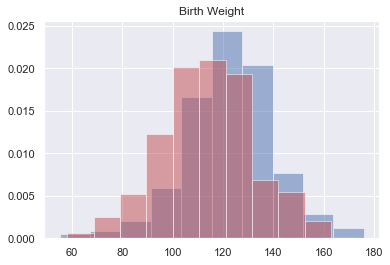

In [8]:
yes = smoking_and_birthweight_df[smoking_and_birthweight_df['Maternal Smoker'] == False]['Birth Weight']
no = smoking_and_birthweight_df[smoking_and_birthweight_df['Maternal Smoker'] == True]['Birth Weight']

plt.hist(yes, alpha=0.5, label='yes', color='b', density=True)
plt.hist(no, alpha=0.5, label='no', color='r', density=True)
plt.title('Birth Weight')
plt.show()

The distribution of the weights of the babies born to mothers who smoked appears to be based slightly to the left of the distribution corresponding to non-smoking mothers. The weights of the babies of the mothers who smoked seem lower on average than the weights of the babies of the non-smokers.

This raises the question of whether the difference reflects just chance variation or a difference in the distributions in the larger population. Could it be that there is no difference between the two distributions in the population, but we are seeing a difference in the samples just because of the mothers who happened to be selected?

# The Hypotheses

We can try to answer this question by a test of hypotheses. The chance model that we will test says that there is no underlying difference in the popuations; the distributions in the samples are different just due to chance.

Formally, this is the null hypothesis. We are going to have to figure out how to simulate a useful statistic under this hypothesis. But as a start, let's just state the two natural hypotheses.


**Null hypothesis:** In the population, the distribution of birth weights of babies is the same for mothers who don't smoke as for mothers who do. The difference in the sample is due to chance.

**Alternative hypothesis:** In the population, the babies of the mothers who smoke have a lower birth weight, on average, than the babies of the non-smokers.

**Test Statistic**

The alternative hypothesis compares the average birth weights of the two groups and says that the average for the mothers who smoke is smaller. Therefore it is reasonable for us to use the difference between the two group means as our statistic.

We will do the subtraction in the order "average weight of the smoking group − average weight of the non-smoking group". Small values (that is, large negative values) of this statistic will favor the alternative hypothesis.

The observed value of the test statistic is about −9.27 ounces.

In [12]:
smoking_and_birthweight_df.groupby('Maternal Smoker').mean()

,Birth Weight
Maternal Smoker,
False,123.085315
True,113.819172


In [13]:
non_smoker = smoking_and_birthweight_df.groupby('Maternal Smoker').mean().iloc(0)[0][0]
smoker = smoking_and_birthweight_df.groupby('Maternal Smoker').mean().iloc(0)[1][0]

# hypothesis: 
# average birth weight of babies born to mothers who smoke is less than 
# the average birth weight of babies born to non-smokers.
observed_diff = smoker-non_smoker
observed_diff

-9.266142572024918

We are going compute such differences repeatedly in our simulations below, so we will define a function to do the job. The function takes three arguments:

    the name of the table of data
    the label of the column that contains the numerical variable whose average is of interest
    the label of the column that contains the Boolean variable for grouping

It returns the difference between the means of the True group and the False group.

In [14]:
def difference_of_means(df, group_label):
    non_smoker = df.groupby(group_label).mean().iloc(0)[0][0]
    smoker = df.groupby(group_label).mean().iloc(0)[1][0]

    observed_diff = smoker-non_smoker
    return observed_diff

To check that the function is working, let's use it to calculate the observed difference between 
the means of the two groups in the sample.

In [15]:
difference_of_means(smoking_and_birthweight_df, 'Maternal Smoker')

-9.266142572024918

Predicting the Statistic Under the Null Hypothesis

To see how the statistic should vary under the null hypothesis, we have to figure out how to simulate the statistic under that hypothesis. A clever method based on random permutations does just that.

If there were no difference between the two distributions in the underlying population, then whether a birth weight has the label True or False with respect to maternal smoking should make no difference to the average. The idea, then, is to shuffle all the labels randomly among the mothers. This is called random permutation.

Take the difference of the two new group means: the mean weight of the babies whose mothers have been randomly labeled smokers and the mean weight of the babies of the remaining mothers who have all been randomly labeled non-smokers. This is a simulated value of the test statistic under the null hypothesis.

Let's see how to do this. It's always a good idea to start with the data.

In [16]:
smoking_and_birthweight_df.head()

,Maternal Smoker,Birth Weight
0,False,120
1,False,113
2,True,128
3,True,108
4,False,136


In [17]:
smoking_and_birthweight_df.shape

(1174, 2)

There are 1,174 rows in the table. To shuffle all the labels, we will draw a random sample of 1,174 rows without replacement. Then the sample will include all the rows of the table, in random order.

We can use the Table method sample with the optional with_replacement=False argument. We don't have to specify a sample size, because by default, sample draws as many times as there are rows in the table.

In [18]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html
temp_df = smoking_and_birthweight_df.sample(n=1174, replace=False).reset_index()
smoking_and_birthweight_df['Shuffled Label'] = temp_df['Maternal Smoker']

In [19]:
smoking_and_birthweight_df.head()

,Maternal Smoker,Birth Weight,Shuffled Label
0,False,120,False
1,False,113,True
2,True,128,True
3,True,108,False
4,False,136,False


Each baby's mother now has a random smoker/non-smoker label in the column Shuffled Label, while her original label is in Maternal Smoker. If the null hypothesis is true, all the random re-arrangements of the labels should be equally likely.

Let's see how different the average weights are in the two randomly labeled groups.

In [20]:
# original
smoking_and_birthweight_df[['Birth Weight', 'Maternal Smoker']].groupby('Maternal Smoker').mean()

,Birth Weight
Maternal Smoker,
False,123.085315
True,113.819172


In [21]:
# shuffled
smoking_and_birthweight_df[['Birth Weight', 'Shuffled Label']].groupby('Shuffled Label').mean()

,Birth Weight
Shuffled Label,
False,119.646154
True,119.176471


The averages of the two randomly selected groups are quite a bit closer than the averages of the two original groups. We can use our function difference_of_means to find the two differences.

In [22]:
print('Original', difference_of_means(smoking_and_birthweight_df, 'Maternal Smoker'))
print('Shuffled', difference_of_means(smoking_and_birthweight_df, 'Shuffled Label'))

Original -9.266142572024918
Shuffled 0.01625607507960447


But could a different shuffle have resulted in a larger difference between the group averages? To get a sense of the variability, we must simulate the difference many times.

As always, we will start by defining a function that simulates one value of the test statistic under the null hypothesis. This is just a matter of collecting the code that we wrote above. But because we will later want to use the same process for comparing means of other variables, we will define a function that takes three arguments:

    the name of the table of data
    the label of the column that contains the numerical variable
    the label of the column that contains the Boolean variable for grouping

It returns the difference between the means of two groups formed by randomly shuffling all the labels.

In [23]:
def one_simulated_difference(df, group_label):
    temp_df = df.sample(n=df.shape[0], replace=False).reset_index()
    df['Shuffled Label'] = temp_df[group_label]
    df = df.drop(group_label, axis=1)
    return difference_of_means(df, 'Shuffled Label')   

In [24]:
# Run several times and see how output changes
one_simulated_difference(smoking_and_birthweight_df, 'Maternal Smoker')

0.32804363392598646

## Permutation Test

Tests based on random permutations of the data are called permutation tests. We are performing one in this example. In the cell below, we will simulate our test statistic – the difference between the averages of the two groups – many times and collect the differences in an array.

In [25]:
differences = []
repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference(smoking_and_birthweight_df, 'Maternal Smoker')
    differences.append(new_difference)

#### The array differences contains 5,000 simulated values of our test statistic: the difference between the mean weight in the smoking group and the mean weight in the non-smoking group, when the labels have been assigned at random

Conclusion of the Test

The histogram below shows the distribution of these 5,000 values. It is the empirical distribution of the test statistic simulated under the null hypothesis. This is a prediction about the test statistic, based on the null hypothesis.

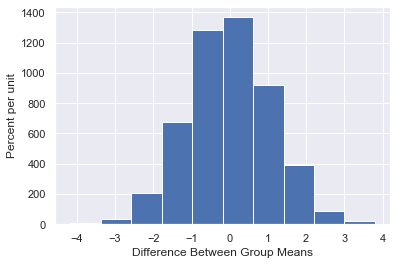

In [26]:
plt.hist(differences)
plt.ylabel('Percent per unit')
plt.xlabel('Difference Between Group Means');

The distribution is centered around 0. This makes sense, because under the null hypothesis the two groups should have roughly the same average. Therefore the difference between the group averages should be around 0.

The observed difference in the original sample is about −9.27 ounces, which doesn't even appear on the horizontal scale of the histogram. The observed value of the statistic and the predicted behavior of the statistic under the null hypothesis are inconsistent.

**The conclusion of the test is that the data favor the alternative over the null. The average birth weight of babies born to mothers who smoke is less than the average birth weight of babies born to non-smokers.**

(low values of the statistic favor the alternative hypothesis)

In [ ]:
observed_difference = difference_of_means(smoking_and_birthweight_df, 'Maternal Smoker')
print('Original', difference_of_means(smoking_and_birthweight_df, 'Maternal Smoker'))

In [ ]:
empirical_P = np.count_nonzero(differences <= observed_difference) / repetitions
empirical_P

The empirical P-value is 0, meaning that none of the 5,000 permuted samples resulted in a difference of -9.27 or lower. This is only an approximation. The exact chance of getting a difference in that range is not 0 but it is vanishingly small.
Another Permutation Test

We can use the same method to compare other attributes of the smokers and the non-smokers, such as their ages. Histograms of the ages of the two groups show that in the sample, the mothers who smoked tended to be younger.

In [ ]:
smoking_and_age_df = births_df[['Maternal Smoker', 'Maternal Age']]

yes = smoking_and_age_df[smoking_and_age_df['Maternal Smoker'] == False]['Maternal Age']
no = smoking_and_age_df[smoking_and_age_df['Maternal Smoker'] == True]['Maternal Age']

plt.hist(yes, alpha=0.5, label='yes', color='b', density=True)
plt.hist(no, alpha=0.5, label='no', color='r', density=True)
plt.title('Maternal Age')
plt.show()

The observed difference between the average ages is about −0.8 years.

In [ ]:
observed_age_difference = difference_of_means(smoking_and_age_df, 'Maternal Smoker')
observed_age_difference

Remember that the difference is calculated as the mean age of the smokers minus the mean age of the non-smokers. The negative sign shows that the smokers are younger on average.

Is this difference due to chance, or does it reflect an underlying difference in the population?

As before, we can use a permutation test to answer this question. If the underlying distributions of ages in the two groups are the same, then the empirical distribution of the difference based on permuted samples will predict how the statistic should vary due to chance.

In [ ]:
differences_age = []
repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference(smoking_and_age_df, 'Maternal Smoker')
    differences_age.append(new_difference)

The observed difference is in the tail of the empirical distribution of the differences simulated under the null hypothesis.

In [ ]:
plt.hist(differences_age)
plt.ylabel('Percent per unit')
plt.xlabel('Difference Between Group Means');

In [ ]:
observed_difference = difference_of_means(smoking_and_age_df, 'Maternal Smoker')
print('Original', difference_of_means(smoking_and_age_df, 'Maternal Smoker'))

The empirical P-value of the test is the proportion of simulated differences that were equal to or less than the observed difference. This is because low values of the difference favor the alternative hypothesis that the smokers were younger on average.

In [ ]:
empirical_P = np.count_nonzero(differences <= observed_difference) / repetitions
empirical_P

The empirical P-value is around 2% and therefore the result is statistically significant. The test supports the hypothesis that the smokers were younger on average.